# Hermite-görbe

## Bevezetés

Az Hermite-görbe az első paraméteres görbe, amivel megismerkedünk. Ez egy olyan harmadfokú görbe, melynek előállításához az egyes kontrollpontok mellett minden kontrollponthoz meg kell adnunk a görbe adott pontbeli érintőjét.

Fontos kiemelni, hogy az *Hermite-görbe* név félrevezető, hiszen ez egy előállítási mód, ahogyan görbét tudunk képezni, és nem a görbék egy speciális fajtája.

## A feladat

Tegyük fel, hogy adott két síkbeli pont, $P$ és $Q$, továbbá adott a $P$-beli érintővektor, $v$ és a $Q$-beli érintővektor, $w$. Egy olyan $H(t)$ ($t \in [0, 1]$) harmadfokú polinomot keresünk, mely teljesíti a következő feltételeket:

$$
\begin{align*}
H(0) &= P \\
H(1) &= Q \\
H^{\prime}(0) &= v \\
H^{\prime}(1) &= w
\end{align*}
$$

## Polinomiális alak

Vezessük le az előző feltételekből a polinomiális alakot! Ez azt jelenti, hogy meg kell határoznunk a $h_1, h_2, h_3, h_4$ súlyfüggvényeket.

Nézzük meg, hogy pontosan hogyan is néz ki $H(t)$:

$$
H(t) = h_1(t) \cdot P + h_2(t) \cdot Q + h_3(t) \cdot v + h_4(t) \cdot w
$$

Pusztán az előző képlet és a feltételek ismeretében már elkezdhetjük egyenként meghatározni a súlyfüggvényekben szereplő együtthatókat.

### $h_1(t)$

Részletesen csak az első súlyfüggvényt vezetjük le, hiszen az együtthatók meghatározása a maradék három esetben teljesen analóg módon elvégezhető.

Kezdjük azzal, hogy felírjuk a sülyfüggvényt és deriváltját még egyelőre csupa ismeretlen együtthatóval:

$$
\begin{align*}
h_1(t) &= a_1 \cdot t^3 + b_1 \cdot t^2 + c_1 \cdot t + d_1 \\
h_1^{\prime}(t) &= 3 a_1 \cdot t^2 + 2 b_1 \cdot t + c_1
\end{align*}
$$

Most pedig a $H(t)$-re vonatkozó feltételeket vezessük át $h_1(t)$-re:

  * Ha $H(0) = P$, akkor $h_1(0) = 1$.
  * Ha $H(1) = Q$, akkor $h_1(1) = 0$.
  * Ha $H^{\prime}(0) = v$, akkor $h_1^{\prime}(0)=0$.
  * Ha $H^{\prime}(1) = w$, akkor $h_1^{\prime}(1)=0$.
  
Folytassuk a levezetést most már a $h_1(t)$-re vonatkozó feltételekkel:

$$
\begin{align*}
h_1(0) &= d_1 &= 1 \\
h_1(1) &= a_1 + b_1 + c_1 + d_1 &= 0 \\
h_1^{\prime}(0) &= c_1 &= 0 \\
h_1^{\prime}(1) &= 3a_1 + 2b_1 + c_1  &= 0
\end{align*}
$$

Az első egyenletből következik, hogy $d_1 = 1$, a harmadik egyenletből pedig, hogy $c_1 = 0$. Tehát marad két egyenlet két ismeretlennel:

$$
\begin{align*}
a_1 + b_1 + 1 &= 0 \\
3a_1 + 2b_1 &= 0
\end{align*}
$$

Ezeket megoldva kapjuk, hogy $a_1 = 2$ és $b_1 = -3$.

Az összes együttható ismeretében most már felírhatjuk, hogy

$$
h_1(t) = 2t^3 -3t^2 + 1.
$$

### $h_2(t), h_3(t), h_4(t)$

A maradék három bázisfüggvény azonos levezetés után a következő formában áll elő:

$$
\begin{align*}
h_2(t) &= -2t^3 + 3t^2 \\
h_3(t) &= t^3 -2t^2 + t \\
h_4(t) &= t^3 - t^2
\end{align*}
$$

Ábrázoljuk a súlyfüggvényeket!

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

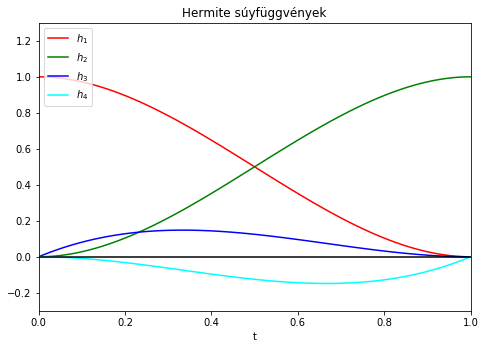

In [36]:
def hermite():
    t = np.linspace(0, 1, 100)

    h1 = 2*t**3 + (-3 * t**2) + 1
    h2 = -2*t**3 + 3 * t**2
    h3 = t**3 + (-2 * t**2) + t
    h4 = t**3 + - t**2

    fig = plt.figure()

    axes = fig.add_axes([0, 0, 1, 1])

    axes.set_xlim([0, 1])
    axes.set_ylim([-0.3, 1.3])

    axes.plot(x, h1, 'r', label='$h_1$')
    axes.plot(x, h2, 'g', label='$h_2$')
    axes.plot(x, h3, 'b', label='$h_3$')
    axes.plot(x, h4, 'cyan', label='$h_4$')
    
    axes.axhline(y=0, color='k')
    
    axes.legend(loc=2);

    axes.set_xlabel('t')
    axes.set_title('Hermite súyfüggvények');


hermite()

## Mátrix alak

A polinomiális alak ismeretében a mátrix alak felírása már nem jelenthet kihívást, hiszen csak az $M$ mátrixot kell összeállítanunk a bázisfüggvények együtthatóiból:

$$
M =
\begin{bmatrix}
2 & -3 & 0 & 1 \\
-2 & 3 & 0 & 0 \\
1 & -2 & 1 & 0 \\
1 & -1 & 0 & 0
\end{bmatrix}.
$$

Tehát

$$
H(t) = 
\begin{bmatrix}
P & Q & v & w
\end{bmatrix}
\cdot
\begin{bmatrix}
2 & -3 & 0 & 1 \\
-2 & 3 & 0 & 0 \\
1 & -2 & 1 & 0 \\
1 & -1 & 0 & 0
\end{bmatrix}
\cdot
\begin{bmatrix}
t^3 \\
t^2 \\
t \\ 
1
\end{bmatrix}.
$$

## Az Hermite-görbe hátrányai

A legnagyobb probléma az Hermite-görbével az, hogy előállításához nemcsak kontrollpontokra, hanem érintőkre is szükség van, mint bemeneti információ. Sokkal szélesebb körben használhatóak az olyan eljárások, melyekhez a kontrollpontokon kívül más geometriai információra nincsen szükség. Látni fogjuk majd, hogy a Bézier-görbe vagy a Cardinal-spline mennyivel kényelmesebb lehetőséget biztosít a görbét előállításához.

## Demonstráció

A következő demonstráció bemutat egy Hermite-görbét. A pontok és az érintők is mozgathatóak, utóbbiak a végpontok megragadásával és vonszolásával.

In [ ]:
addScript("js/hermite-demo", "hermite-demo")

## Források

* D. D. Hearn, M. P. Baker, W. Caritehers (2014). *Computer Graphics With OpenGL*, Fourth Edition, pp. 416-417.
* J. F. Hughes, A. van Dam (2013). *Computer Graphics: Principles and Practice*, Third Edition, Chapter 22W, pp. 82-86. http://dept.cs.williams.edu/~morgan/cgpp/file/cgpp3e_ch22W.pdf